Gaussian Filtering a 1D noisy image

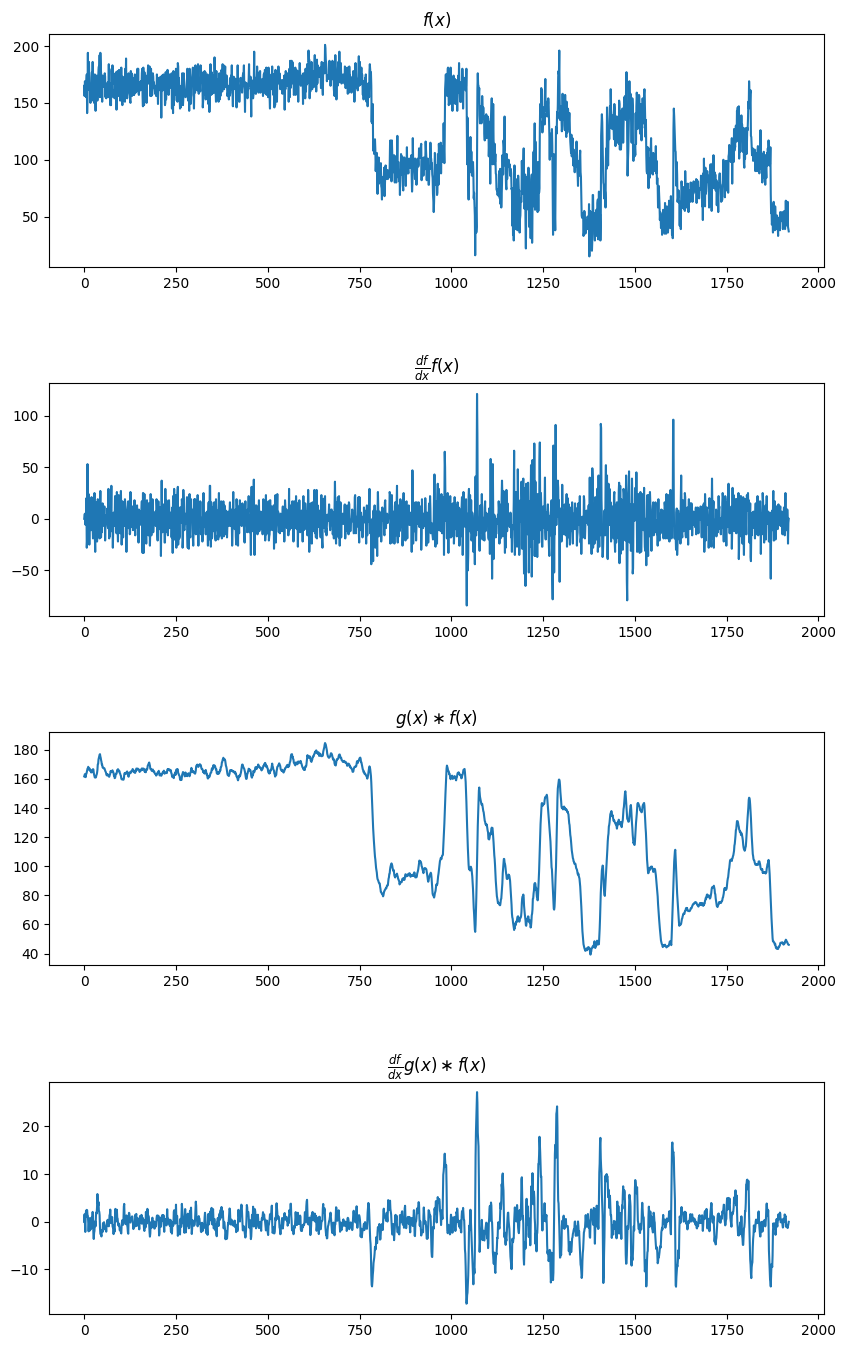

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image 'stripe.png' in grayscale
im = cv.imread('spiderman.jpg', cv.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
mean = 0
sigma = 0.05
noise = np.random.normal(mean, sigma, im.shape)
im = im.astype(np.float64) / 255.0
im = cv.add(im, noise) * 255
im = cv.normalize(im, None, 0, 255, cv.NORM_MINMAX)
im = im.astype(np.uint8)

cv.imshow('Image', cv.resize(im, None, fx=0.5, fy=0.5))
cv.waitKey(0)
cv.destroyAllWindows()

# Take a horizontal line (row) from the image
f = im[150, :]

# Define a kernel for taking the derivative (gradient)
kernel = np.array([-1, 0, 1])

# Compute the derivative of the horizontal line (row)
fx = cv.filter2D(f, cv.CV_32F, kernel)

# Create a Gaussian kernel for smoothing
g = cv.getGaussianKernel(11, 5., cv.CV_64F)

# Apply Gaussian smoothing to the horizontal line (row)
fgf = cv.filter2D(f, cv.CV_32F, g)

# Apply the derivative kernel to the smoothed line
fgfx = cv.filter2D(fgf, cv.CV_32F, kernel)

# Create a window to display the original image

cv.imshow('Image', cv.resize(im, None, fx=0.5, fy=0.5))
cv.waitKey(0)
cv.destroyAllWindows()

# Create subplots to visualize the results
fig, ax = plt.subplots(4, figsize=(10, 16))
ax[0].plot(f)
ax[0].set_title('$f(x)$')

ax[1].plot(fx)
ax[1].set_title(r'$\frac{df}{dx}f(x)$')  # Fixed the title

ax[2].plot(fgf)
ax[2].set_title(r'$g(x) \ast f(x)$')

ax[3].plot(fgfx)
ax[3].set_title(r'$\frac{df}{dx}g(x) \ast f(x)$')  # Fixed the title

# Adjust the layout for better visualization
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.5)
plt.show()


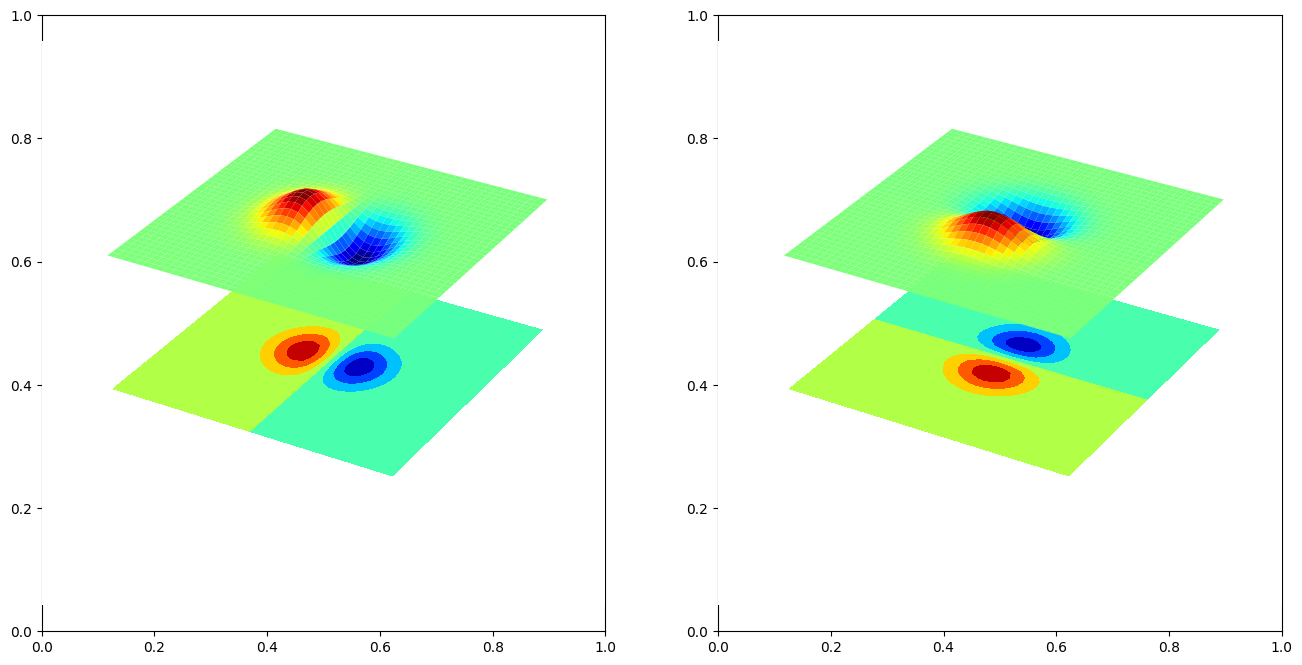

In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Define the standard deviation (sigma) for the Gaussian function
sigma = 1

# Generate a grid of points (X, Y) and compute the Gaussian function Z
X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Define two 2D convolution kernels for edge detection in X and Y directions
kernel_x = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]], dtype=np.float64)
kernel_y = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]], dtype=np.float64)

# Apply the convolution filters to the Gaussian surface to get Zx and Zy
Zx = cv.filter2D(Z, -1, kernel_x)
Zy = cv.filter2D(Z, -1, kernel_y)

# Create surfaces for the plots
surf1 = ax1.plot_surface(X, Y, Zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2 = ax2.plot_surface(X, Y, Zy, cmap=cm.jet, linewidth=0, antialiased=True)

# Set z-axis properties and add contour plots on the bottom
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cset = ax1.contourf(X, Y, Zx, zdir='z', offset=np.min(Z) - 1.5, cmap=cm.jet)
ax1.set_zlim(np.min(Zx) - 2, np.max(Zx))
cset = ax2.contourf(X, Y, Zy, zdir='z', offset=np.min(Z) - 1.5, cmap=cm.jet)
ax2.set_zlim(np.min(Zy) - 2, np.max(Zx))

# Turn off the axes for better visualization
ax1.axis('off')
ax2.axis('off')

# Display the 3D plots
plt.show()


Image Gradients Using the Central Difference Formula

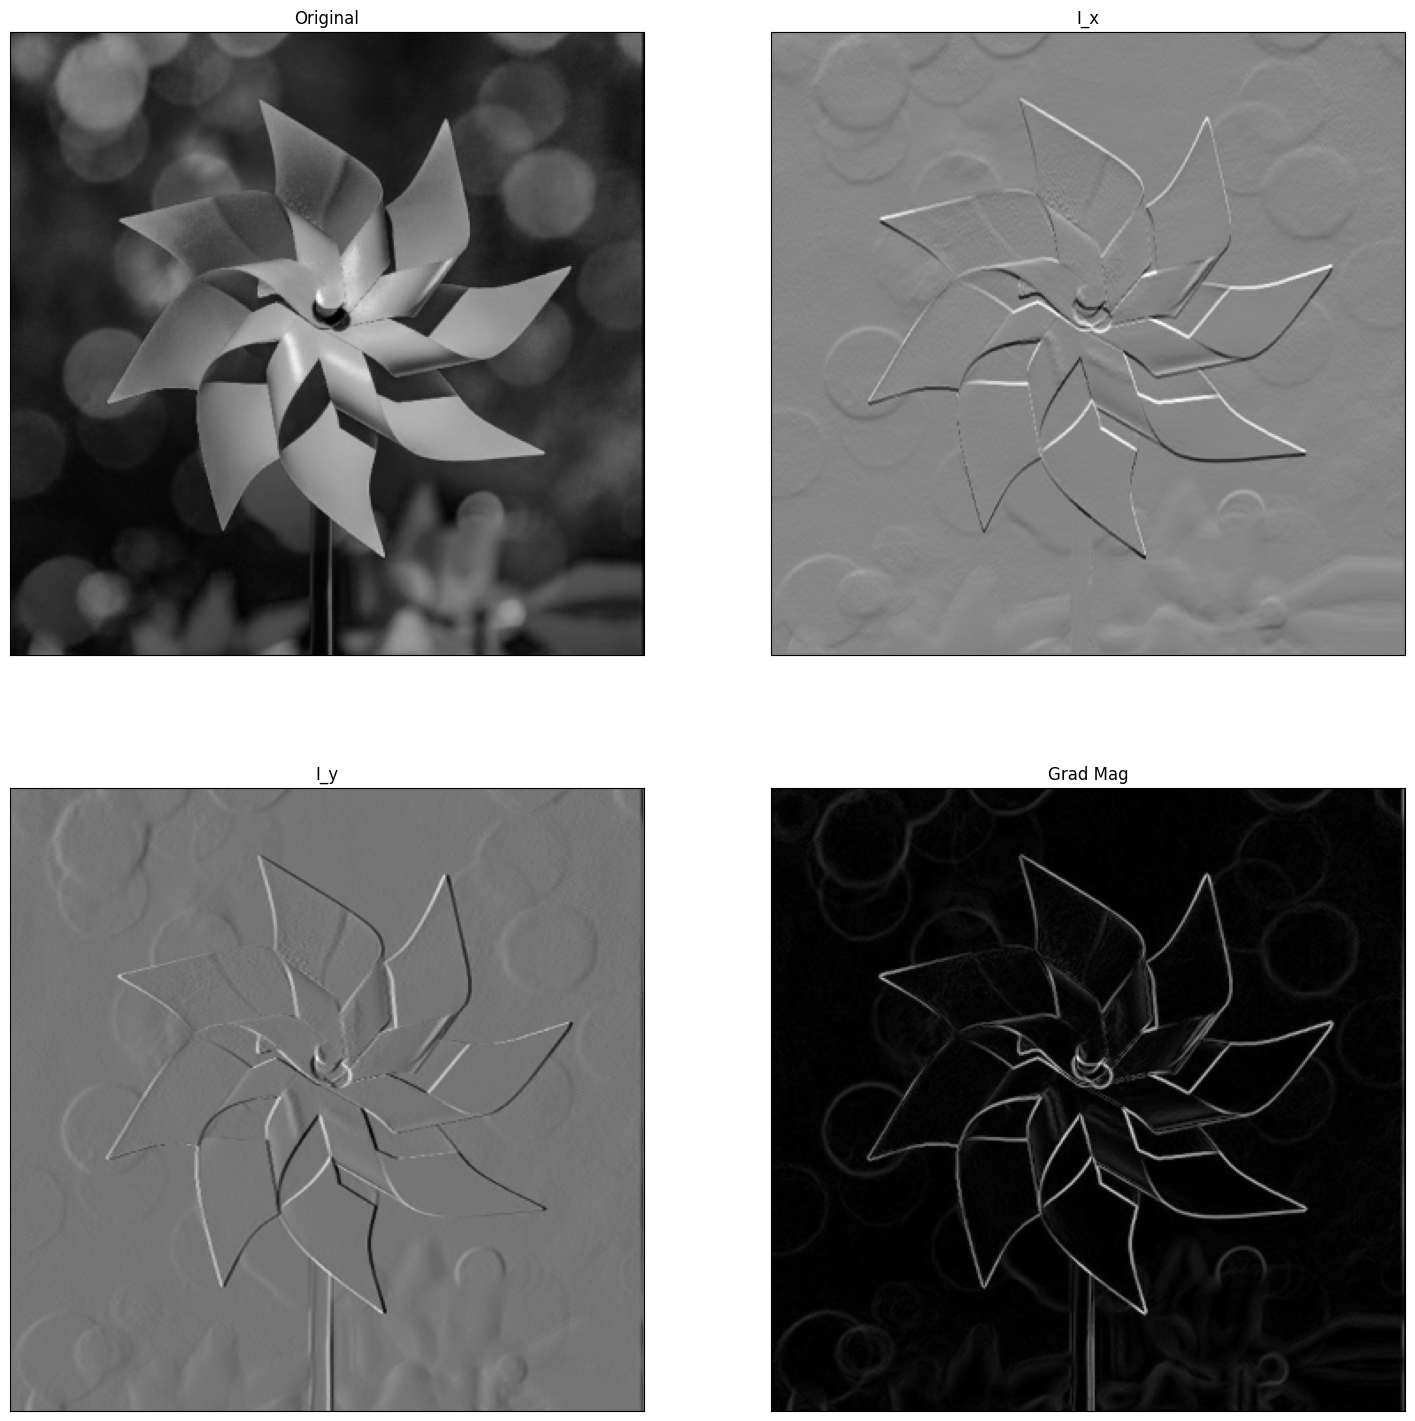

In [35]:
# Import necessary libraries
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image 'building.tif' and convert it to grayscale
img = cv.imread('edgeflower.jpg', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Define a kernel for horizontal gradient (I_x)
kernel = np.array([[-1], [0], [1]])
Ix = cv.filter2D(I, cv.CV_32F, kernel)

# Define a kernel for vertical gradient (I_y)
kernel = np.array([[-1, 0, 1]])
Iy = cv.filter2D(I, cv.CV_32F, kernel)

# Compute the magnitude of the gradient
grad_mag = np.sqrt(Ix**2 + Iy**2)

# Normalize the gradient magnitude to [0, 255]
grad_mag = cv.normalize(grad_mag, grad_mag, 0, 255, cv.NORM_MINMAX)

# Create a 2x2 subplot for visualization
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(18, 18))

# Display the original image
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])

# Display the horizontal gradient (I_x)
axes[0, 1].imshow(Ix+127, cmap='gray')  # Adding 127 for visualization purposes
axes[0, 1].set_title('I_x')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])

# Display the vertical gradient (I_y)
axes[1, 0].imshow(Iy + 127, cmap='gray')  # Adding 127 for visualization purposes
axes[1, 0].set_title('I_y')
axes[1, 0].set_xticks([]), axes[1, 0].set_yticks([])

# Display the gradient magnitude
axes[1, 1].imshow(grad_mag, cmap='gray')
axes[1, 1].set_title('Grad Mag')
axes[1, 1].set_xticks([]), axes[1, 1].set_yticks([])

# Show the subplots
plt.show()


Canny

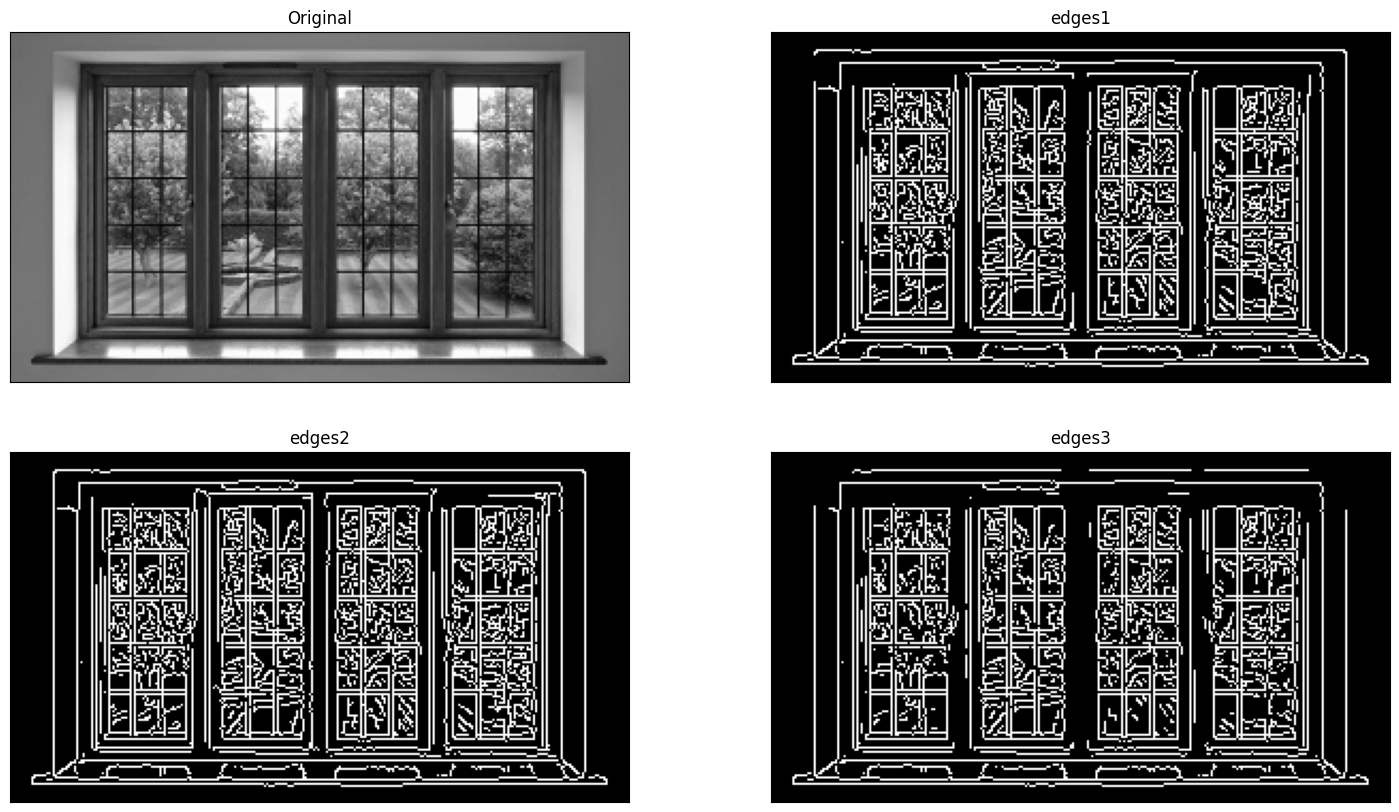

In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image 'building.tif' and convert it to grayscale
img = cv.imread('window.jpg', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Apply Canny edge detection with different thresholds
edges1 = cv.Canny(img, 100, 200)
edges2 = cv.Canny(img, 50, 200)
edges3 = cv.Canny(img, 175, 200)

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(18, 10))
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])
axes[0, 1].imshow(edges1, cmap='gray')
axes[0, 1].set_title('edges1')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])
axes[1, 0].imshow(edges2, cmap='gray')
axes[1, 0].set_title('edges2')
axes[1, 0].set_xticks([]), axes[1, 0].set_yticks([])
axes[1, 1].imshow(edges3, cmap='gray')
axes[1, 1].set_title('edges3')
axes[1, 1].set_xticks([]), axes[1, 1].set_yticks([])

# Show the subplots
plt.show()


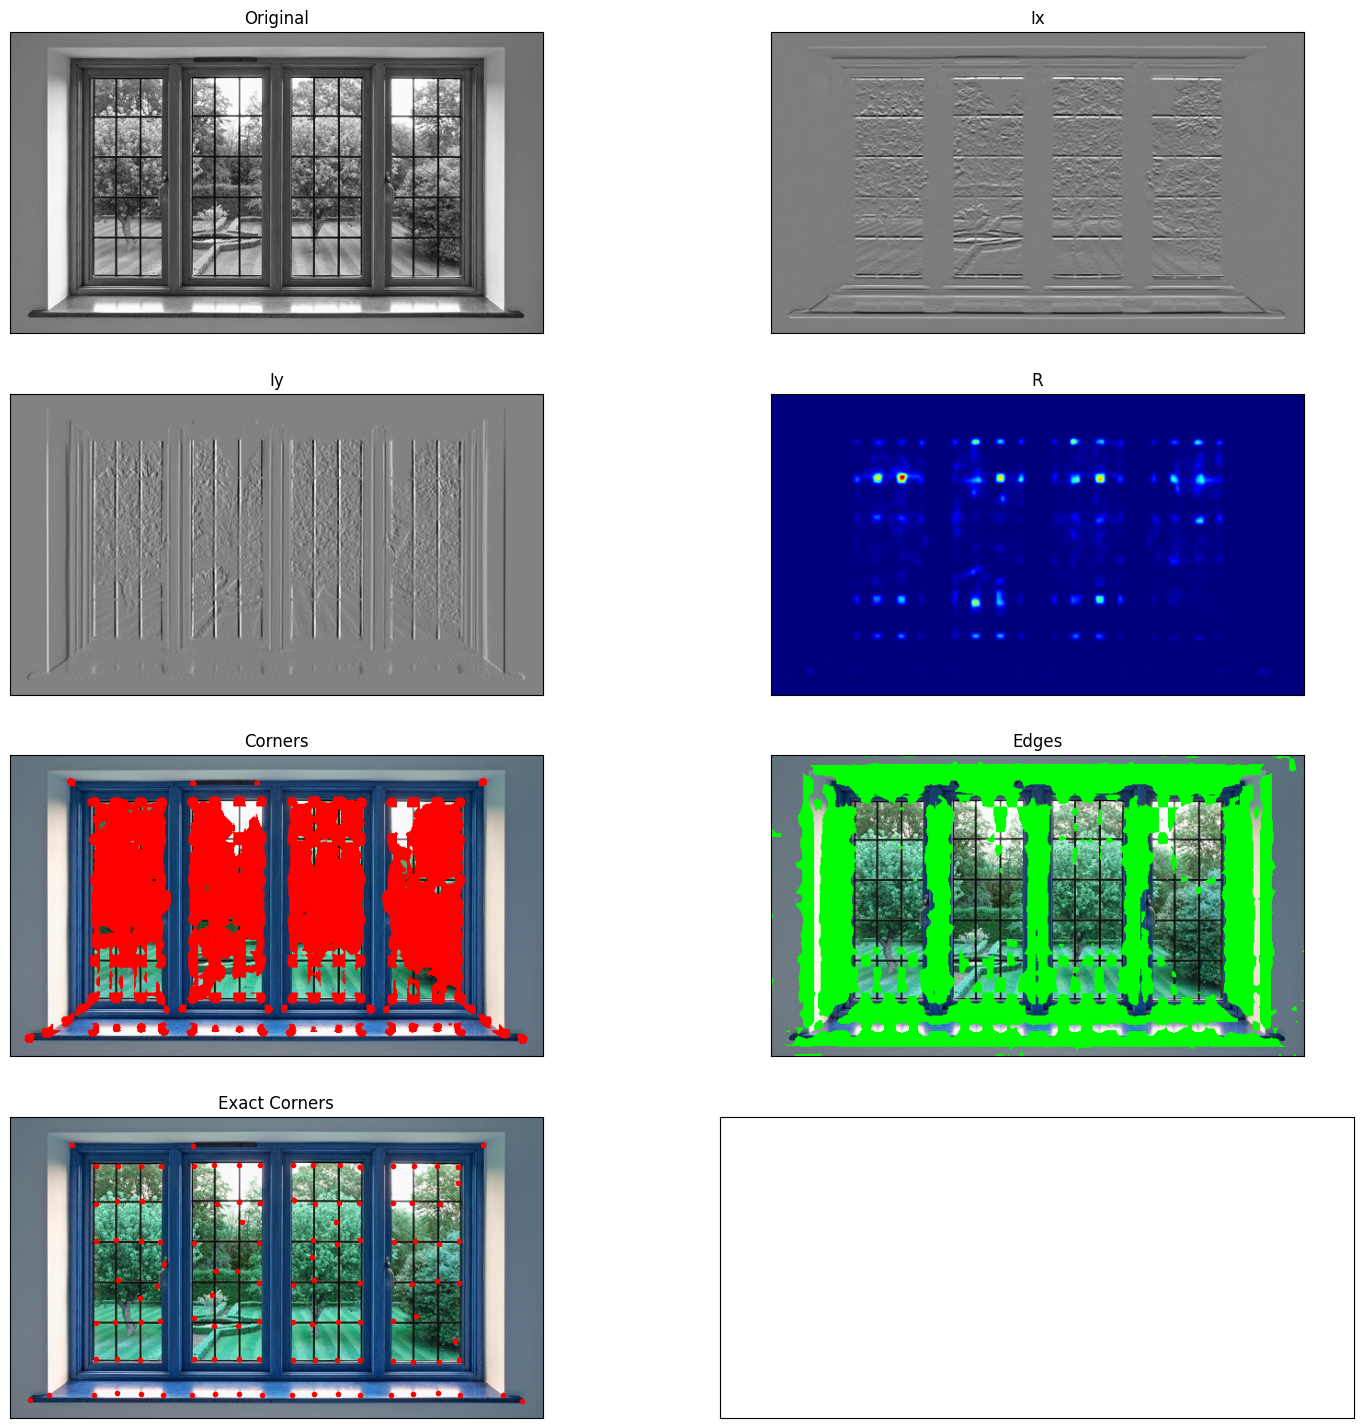

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max

# Load the image in color and convert it to grayscale
im = cv.imread('window.jpg', cv.IMREAD_COLOR)
I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define kernels for horizontal and vertical gradients
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')
Ix = cv.filter2D(I, cv.CV_32F, kernel)
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
Iy = cv.filter2D(I, cv.CV_32F, kernel)

# Define parameters for Harris corner detection
sigma = 3
ksize = 11

# Compute the structure tensor elements
m11 = cv.GaussianBlur(Ix * Ix, (ksize, ksize), sigma)
m22 = cv.GaussianBlur(Iy * Iy, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix * Iy, (ksize, ksize), sigma)
m21 = m12

# Compute the Harris corner response
det = m11 * m22 - m12 * m21
trace = m11 + m22
alpha = 0.04
R = det - alpha * trace * trace

# Copy the image for corner and edge visualization
img_copy_for_corners = np.copy(im)
img_copy_for_edges = np.copy(im)

# Threshold the Harris response to find corners
for rowindex, response in enumerate(R):
    for colindex, r in enumerate(response):
        if r > 1.E7:
            # This is a corner
            img_copy_for_corners[rowindex, colindex] = [255, 0, 0]
        elif r < 0:
            # This is an edge
            img_copy_for_edges[rowindex, colindex] = [0, 255, 0]

# Threshold the Harris response for exact corner coordinates
R[R < 1.E7] = 0
coordinates = peak_local_max(R, min_distance=15)

# Create subplots for visualization
fig, axes = plt.subplots(4, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])

axes[0, 1].imshow(Ix, cmap='gray')
axes[0, 1].set_title('Ix')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])

axes[1, 0].imshow(Iy, cmap='gray')
axes[1, 0].set_title('Iy')
axes[1, 0].set_xticks([]), axes[1, 0].set_yticks([])

axes[1, 1].imshow(R, cmap='jet')
axes[1, 1].set_title('R')
axes[1, 1].set_xticks([]), axes[1, 1].set_yticks([])

axes[2, 0].imshow(img_copy_for_corners, cmap='gray')
axes[2, 0].set_title('Corners')
axes[2, 0].set_xticks([]), axes[2, 0].set_yticks([])

axes[2, 1].imshow(img_copy_for_edges, cmap='gray')
axes[2, 1].set_title('Edges')
axes[2, 1].set_xticks([]), axes[2, 1].set_yticks([])

axes[3, 0].imshow(im, cmap='gray')
axes[3, 0].set_title('Exact Corners')
axes[3, 0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
axes[3, 0].set_xticks([]), axes[3, 0].set_yticks([])

# Show the subplots
plt.show()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


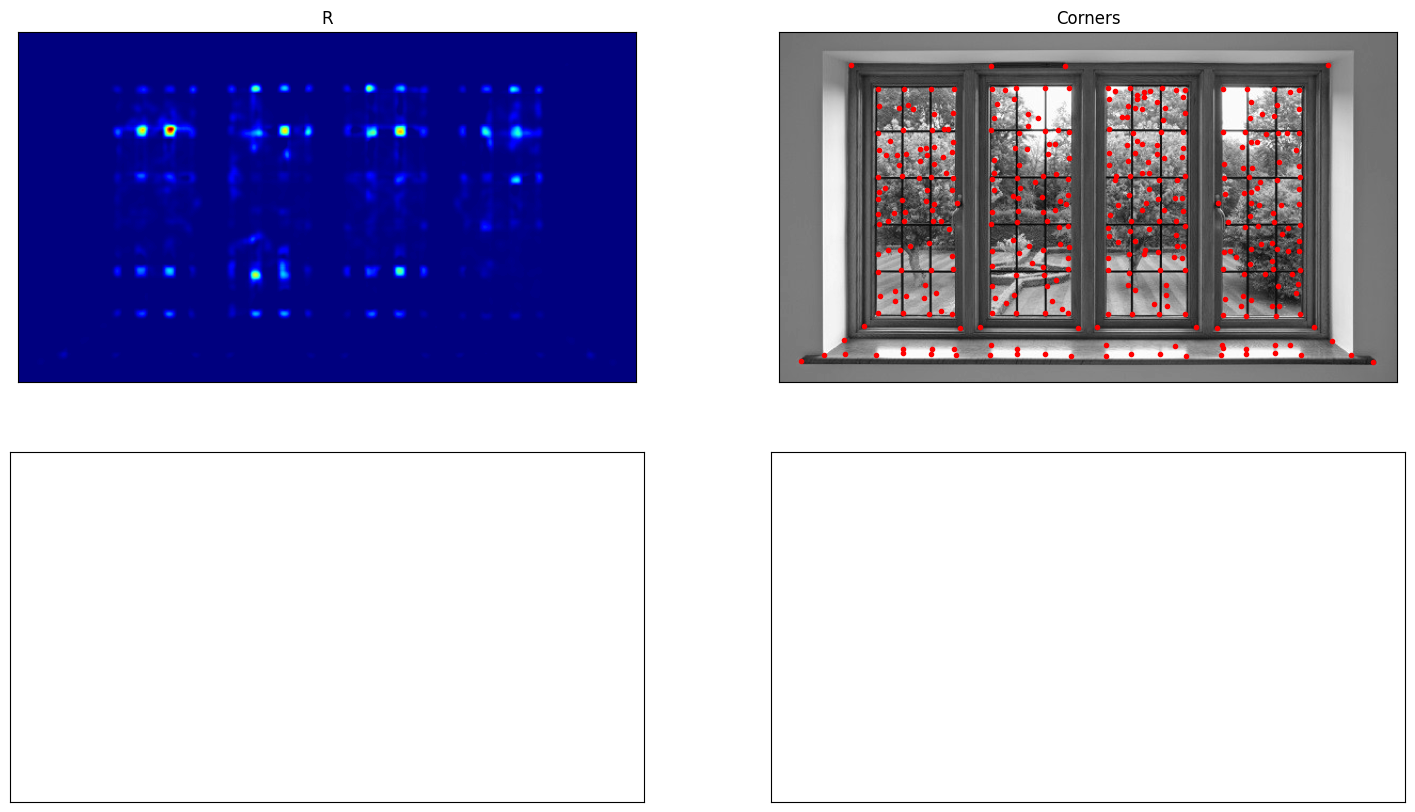

[[ 91 143]
 [ 93 358]
 [ 91 116]
 [ 92 249]
 [227 222]
 [ 52 329]
 [ 52 222]
 [ 94 332]
 [223 357]
 [ 93 437]
 [ 94 468]
 [ 93 272]
 [ 53 464]
 [138 467]
 [ 94 225]
 [ 52 249]
 [223 142]
 [ 52 359]
 [227 248]
 [263 249]
 [263 222]
 [220 247]
 [264 141]
 [223 114]
 [114 252]
 [264 331]
 [ 94  93]
 [134 115]
 [194 219]
 [225 328]
 [ 53 439]
 [138 356]
 [108 221]
 [264 356]
 [103 442]
 [223 380]
 [ 54 487]
 [263 116]
 [ 94 476]
 [ 53 164]
 [ 90 155]
 [135 142]
 [ 90 158]
 [ 93 379]
 [ 53 200]
 [ 93 416]
 [ 52 272]
 [135 488]
 [ 53 117]
 [182 437]
 [224  93]
 [ 90 309]
 [134 329]
 [219 200]
 [ 53 142]
 [204 247]
 [ 94 487]
 [223 308]
 [137 200]
 [ 78 464]
 [132 201]
 [ 54 380]
 [136 417]
 [ 52 308]
 [152 328]
 [ 80 201]
 [ 62 220]
 [135 440]
 [136 163]
 [ 72 487]
 [ 68 467]
 [ 53 416]
 [148 201]
 [ 76 145]
 [263 271]
 [ 82 360]
 [114 354]
 [ 91 199]
 [ 91 261]
 [148 139]
 [206 355]
 [263  93]
 [263 200]
 [ 80 441]
 [ 53  93]
 [181 380]
 [ 54 372]
 [134 380]
 [ 95 456]
 [222 271]
 [156 355]

In [20]:
# Display the Harris corner response image
print(R)

# Threshold the Harris response to remove weak corners
R[R < 1.E7] = 0

# Use peak_local_max to find exact corner coordinates
coordinates = peak_local_max(R, min_distance=2)

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(18, 10))

# Plot the Harris corner response image
axes[0, 0].imshow(R, cmap='jet')
axes[0, 0].set_title('R')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])

# Plot the original image with detected corners marked in red
axes[0, 1].imshow(cv.cvtColor(im,cv.COLOR_BGR2GRAY), cmap='gray')
axes[0, 1].set_title('Corners')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])

# Mark the detected corners in red
axes[0, 1].plot(coordinates[:, 1], coordinates[:, 0], 'r.')

# Show the subplots
plt.show()

# Print the coordinates of detected corners
print(coordinates)


Canny Edge detector

In [4]:
# Canny edge detection
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('girl.jpg', cv.IMREAD_COLOR)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)

edges1 = cv.Canny(im,250,300)

cv.imshow('Image', edges1)
cv.waitKey(0)
cv.destroyAllWindows()

change lower threshold and higher threshold

In [14]:
import cv2 as cv
import numpy as np
import math

# Define the maximum value for the high threshold
hi_threshold_max = 255

# Create a window title
title_window = r'Canny'

# Define the ratio for calculating the low threshold
ratio = 0.3  # Low threshold / High threshold

# Initialize the high threshold (maximum) and calculate the initial low threshold
hi_threshold = 255
low_threshold = math.floor(hi_threshold * ratio)

# Function to be called when trackbar values change
def on_trackbar(val):
    # Retrieve the current high threshold value from the trackbar
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    
    # Retrieve the ratio value (as a percentage) from the trackbar and convert it to a decimal
    ratio = cv.getTrackbarPos(trackbar2_name, title_window) / 100.0
    
    # Calculate the low threshold based on the high threshold and ratio
    low_threshold = hi_threshold * ratio
    
    # Apply the Canny edge detection with the updated thresholds
    edges = cv.Canny(im, low_threshold, hi_threshold)
    
    # Display the edge-detected image in the window
    cv.imshow(title_window, edges)

# Read the input image
im = cv.imread('girl.jpg', cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image: ')
    exit(0)

# Create a named window for displaying the image and trackbars
cv.namedWindow(title_window)

# Create a trackbar for adjusting the high threshold value
trackbar1_name = r'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window, hi_threshold, hi_threshold_max, on_trackbar)

# Create a trackbar for adjusting the ratio (low threshold as a percentage of high threshold)
trackbar2_name = r'Low Threshold %'
cv.createTrackbar(trackbar2_name, title_window, 1, 100, on_trackbar)

# Initialize the edge detection with the initial high and low thresholds
on_trackbar(hi_threshold)

# Wait for user interaction and display the image
cv.waitKey()
cv.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


Circle detection

In [15]:
# Hough circules for the coin image
import cv2 as cv
import numpy as np
im = cv.imread('coins.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
imc = cv.cvtColor(im,cv.COLOR_GRAY2BGR)
im = cv.medianBlur(im, 5)

circles = cv.HoughCircles(im, cv.HOUGH_GRADIENT, dp=2, minDist=50, param1=200, param2=100, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(imc,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(imc,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',imc)
cv.waitKey(0)
cv.destroyAllWindows()

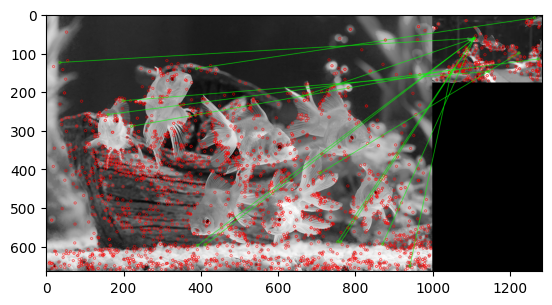

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the two grayscale images
img1 = cv.imread('fish1.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('fish2.jpg', cv.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv.SIFT_create()

# Find keypoints and descriptors for both images using SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Define FLANN parameters for keypoint matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass an empty dictionary

# Create a FLANN-based matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Perform nearest-neighbor matching between descriptors of both images
matches = flann.knnMatch(des1, des2, k=2)

# Initialize a mask to filter good matches
matchesMask = [[0, 0] for i in range(len(matches))]

# Apply the ratio test as per Lowe's paper to filter good matches
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Define parameters for drawing matches
draw_params = dict(
    matchColor=(0, 255, 0),          # Color for good matches
    singlePointColor=(255, 0, 0),    # Color for keypoints
    matchesMask=matchesMask,         # Mask to indicate good matches
    flags=cv.DrawMatchesFlags_DEFAULT
)

# Draw the matched keypoints on a new image
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Display the image with matched keypoints
plt.imshow(img3)
plt.show()


blobs


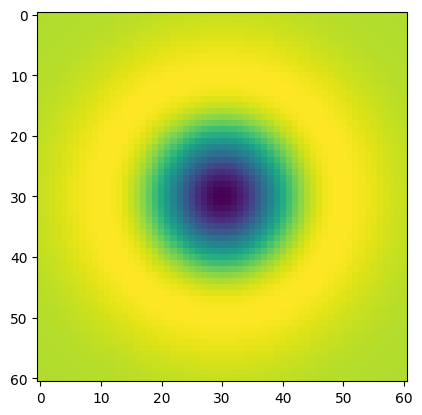

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

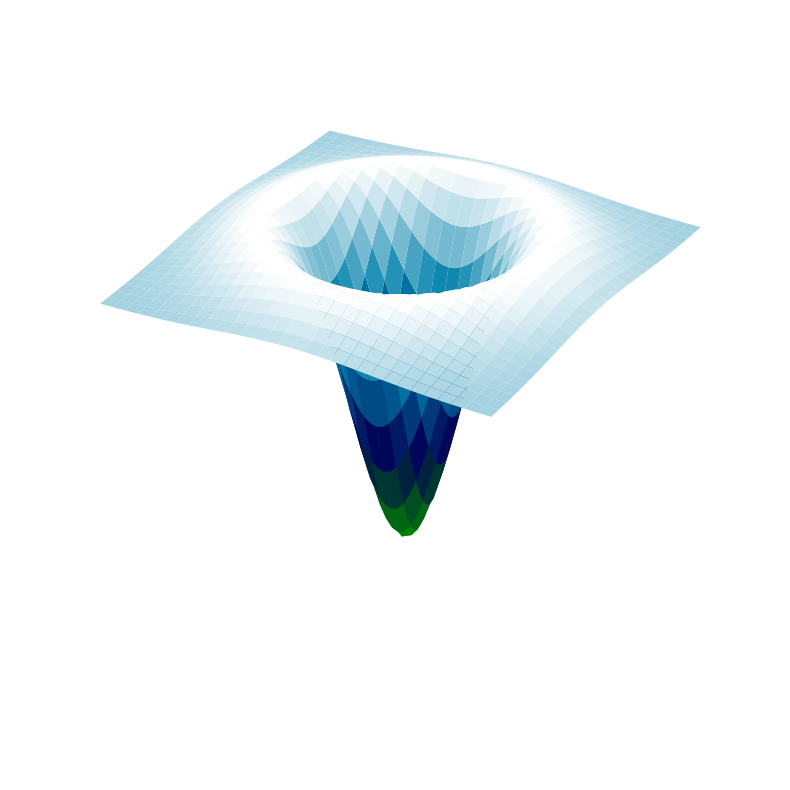

In [10]:
# This is not required
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

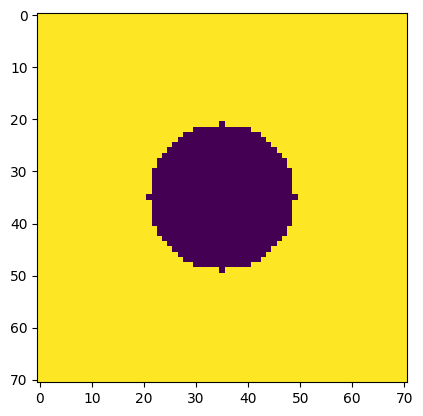

In [11]:
# Generating the circle
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)

(35, 35, 5)
10


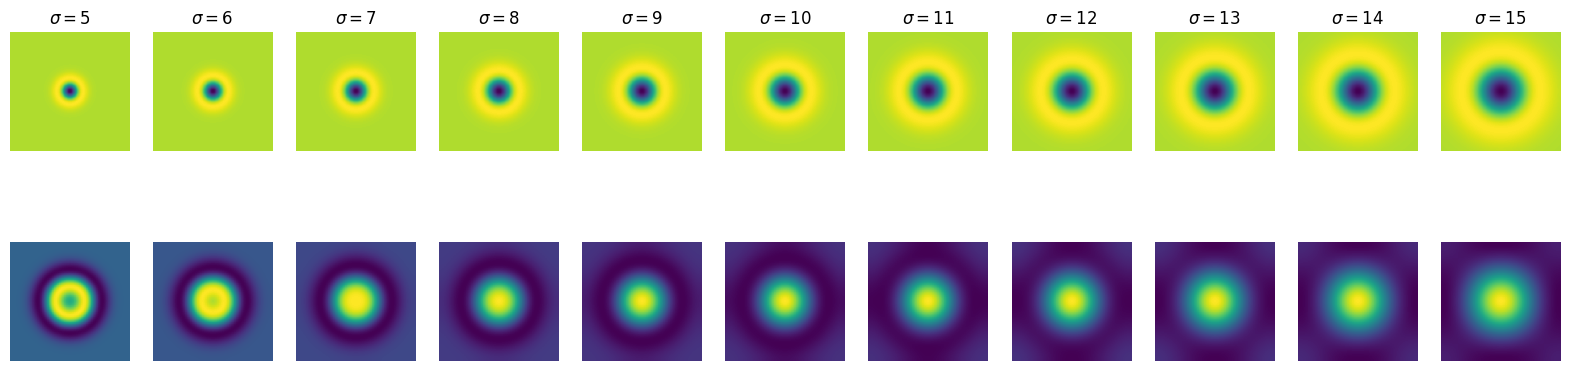

In [12]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])